# PIRvision_FoG_presence_detection

# Exploratory Data Analysis

In [46]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

In [47]:

zip_path = "data/pirvision_fog_presence_detection.zip"
extract_dir = "unzipped_data"

# Unzip into a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print(os.listdir(extract_dir))

['pirvision_office_dataset2.csv', 'pirvision_office_dataset1.csv']


In [48]:
df1 = pd.read_csv("data/unzipped_data/pirvision_office_dataset1.csv")


In [49]:
df2 = pd.read_csv("data/unzipped_data/pirvision_office_dataset2.csv")


In [50]:
print("Shapes:", df1.shape, df2.shape)


print("Data identical:", df1.equals(df2))


Shapes: (7651, 59) (7651, 59)
Data identical: True


In [51]:
df2.head()

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


In [52]:
print(df2.columns.tolist())

['Date', 'Time', 'Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3', 'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10', 'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17', 'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24', 'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31', 'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38', 'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45', 'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52', 'PIR_53', 'PIR_54', 'PIR_55']


In [53]:
print(df2.index)

RangeIndex(start=0, stop=7651, step=1)


In [54]:
df2["Timestamp"] = pd.to_datetime(df2["Date"] + " " + df2["Time"])
df2 = df2.set_index("Timestamp")


In [55]:
print(df2.shape)
print(df2.isna().sum())
print(df2["Label"].value_counts(normalize=True))


(7651, 59)
Date             0
Time             0
Label            0
Temperature_F    0
PIR_1            0
PIR_2            0
PIR_3            0
PIR_4            0
PIR_5            0
PIR_6            0
PIR_7            0
PIR_8            0
PIR_9            0
PIR_10           0
PIR_11           0
PIR_12           0
PIR_13           0
PIR_14           0
PIR_15           0
PIR_16           0
PIR_17           0
PIR_18           0
PIR_19           0
PIR_20           0
PIR_21           0
PIR_22           0
PIR_23           0
PIR_24           0
PIR_25           0
PIR_26           0
PIR_27           0
PIR_28           0
PIR_29           0
PIR_30           0
PIR_31           0
PIR_32           0
PIR_33           0
PIR_34           0
PIR_35           0
PIR_36           0
PIR_37           0
PIR_38           0
PIR_39           0
PIR_40           0
PIR_41           0
PIR_42           0
PIR_43           0
PIR_44           0
PIR_45           0
PIR_46           0
PIR_47           0
PIR_48           0
P

<AxesSubplot:>

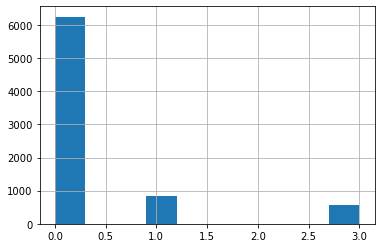

In [56]:
df2["Label"].hist()

<AxesSubplot:>

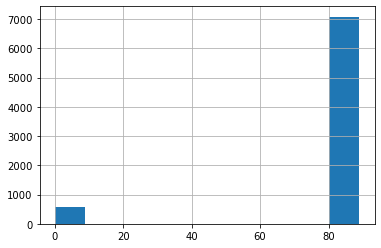

In [57]:
df2["Temperature_F"].hist()

In [58]:
df2["Label"].value_counts()



0    6247
1     833
3     571
Name: Label, dtype: int64

array([[<AxesSubplot:title={'center':'PIR_1'}>,
        <AxesSubplot:title={'center':'PIR_38'}>],
       [<AxesSubplot:title={'center':'PIR_38'}>, <AxesSubplot:>]],
      dtype=object)

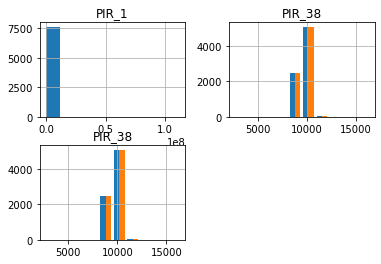

In [59]:
df2[['PIR_1', "PIR_38", "PIR_38"]].hist()

<AxesSubplot:xlabel='Label', ylabel='PIR_13'>

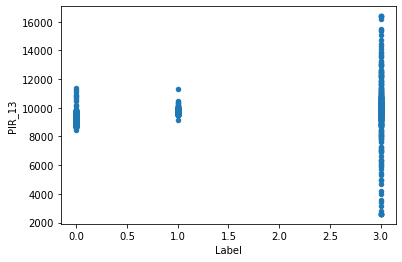

In [60]:
df2.plot(kind="scatter", x='Label', y="PIR_13")

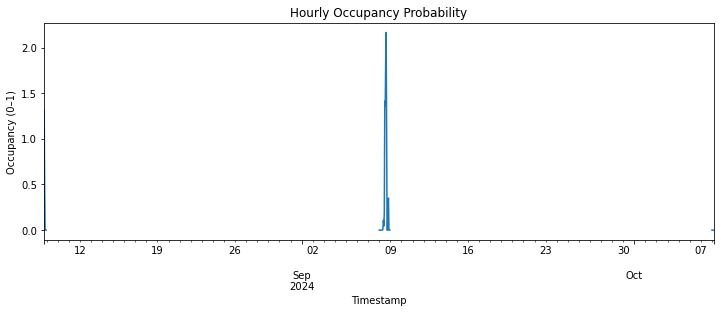

In [61]:
#overall occupancy trend


df2["Label"].resample("H").mean().plot(figsize=(12,4))
plt.title("Hourly Occupancy Probability")
plt.ylabel("Occupancy (0–1)")
plt.show()


In [62]:
df2["Label"].resample("H").mean()

Timestamp
2024-08-08 19:00:00    1.312849
2024-08-08 20:00:00    0.444444
2024-08-08 21:00:00    0.000000
2024-08-08 22:00:00    0.000000
2024-08-08 23:00:00    0.000000
                         ...   
2024-10-08 00:00:00    0.000000
2024-10-08 01:00:00    0.000000
2024-10-08 02:00:00    0.000000
2024-10-08 03:00:00    0.000000
2024-10-08 04:00:00    0.000000
Freq: H, Name: Label, Length: 1450, dtype: float64

In [63]:
df2 = df2.sort_index()


In [64]:
occ_resampled = df2["Label"].resample("5T").mean()
print(occ_resampled.isna().sum())   # how many NaNs?
print(occ_resampled.head(20))       # first few values


16992
Timestamp
2024-08-08 19:15:00    0.000000
2024-08-08 19:20:00    0.055556
2024-08-08 19:25:00    0.000000
2024-08-08 19:30:00    0.000000
2024-08-08 19:35:00    1.500000
2024-08-08 19:40:00    2.760000
2024-08-08 19:45:00    1.000000
2024-08-08 19:50:00    1.000000
2024-08-08 19:55:00    2.866667
2024-08-08 20:00:00    2.791667
2024-08-08 20:05:00    1.636364
2024-08-08 20:10:00    0.000000
2024-08-08 20:15:00    0.000000
2024-08-08 20:20:00    0.000000
2024-08-08 20:25:00    0.000000
2024-08-08 20:30:00    0.000000
2024-08-08 20:35:00    0.000000
2024-08-08 20:40:00    0.055556
2024-08-08 20:45:00    0.000000
2024-08-08 20:50:00    0.000000
Freq: 5T, Name: Label, dtype: float64


In [65]:
print(df2["Label"].unique()[:20])


[0 1 3]


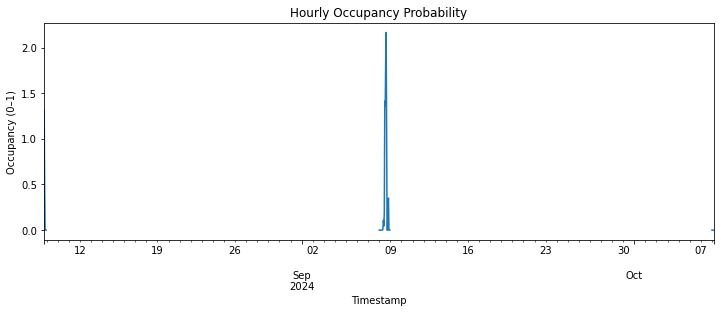

In [66]:
import matplotlib.pyplot as plt

df2["Label"].resample("H").mean().plot(figsize=(12,4))
plt.title("Hourly Occupancy Probability")
plt.ylabel("Occupancy (0–1)")
plt.show()


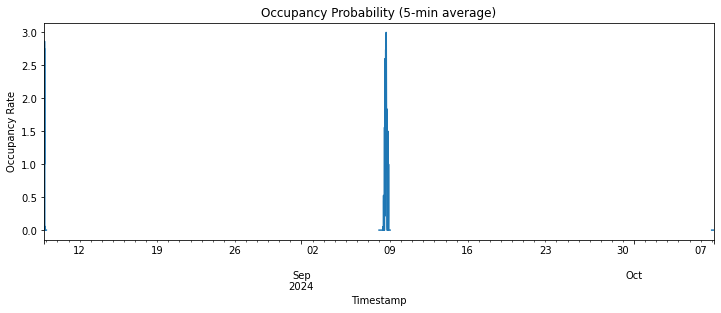

In [67]:
df2["Label"].resample("5T").mean().plot(figsize=(12,4))
plt.title("Occupancy Probability (5-min average)")
plt.ylabel("Occupancy Rate")
plt.show()


In [68]:
print(df2["Label"] == df2["Label"].astype(int))


Timestamp
2024-08-08 19:19:56    True
2024-08-08 19:20:12    True
2024-08-08 19:20:28    True
2024-08-08 19:20:44    True
2024-08-08 19:21:00    True
                       ... 
2024-10-08 04:34:17    True
2024-10-08 04:34:33    True
2024-10-08 04:34:49    True
2024-10-08 04:35:05    True
2024-10-08 04:35:21    True
Name: Label, Length: 7651, dtype: bool


In [69]:
occ_resampled = df2["Label"].resample("5T").mean()
print(occ_resampled.head(5))


Timestamp
2024-08-08 19:15:00    0.000000
2024-08-08 19:20:00    0.055556
2024-08-08 19:25:00    0.000000
2024-08-08 19:30:00    0.000000
2024-08-08 19:35:00    1.500000
Freq: 5T, Name: Label, dtype: float64


In [70]:
print(df2["Label"].unique()[:20])
print(df2[["Date","Time","Label"]].head(10))


[0 1 3]
                           Date      Time  Label
Timestamp                                       
2024-08-08 19:19:56  2024-08-08  19:19:56      0
2024-08-08 19:20:12  2024-08-08  19:20:12      1
2024-08-08 19:20:28  2024-08-08  19:20:28      0
2024-08-08 19:20:44  2024-08-08  19:20:44      0
2024-08-08 19:21:00  2024-08-08  19:21:00      0
2024-08-08 19:21:16  2024-08-08  19:21:16      0
2024-08-08 19:21:32  2024-08-08  19:21:32      0
2024-08-08 19:21:48  2024-08-08  19:21:48      0
2024-08-08 19:22:04  2024-08-08  19:22:04      0
2024-08-08 19:22:20  2024-08-08  19:22:20      0


In [71]:
print(df2[["Date","Time","Label"]].head(10))


                           Date      Time  Label
Timestamp                                       
2024-08-08 19:19:56  2024-08-08  19:19:56      0
2024-08-08 19:20:12  2024-08-08  19:20:12      1
2024-08-08 19:20:28  2024-08-08  19:20:28      0
2024-08-08 19:20:44  2024-08-08  19:20:44      0
2024-08-08 19:21:00  2024-08-08  19:21:00      0
2024-08-08 19:21:16  2024-08-08  19:21:16      0
2024-08-08 19:21:32  2024-08-08  19:21:32      0
2024-08-08 19:21:48  2024-08-08  19:21:48      0
2024-08-08 19:22:04  2024-08-08  19:22:04      0
2024-08-08 19:22:20  2024-08-08  19:22:20      0


In [72]:
print(df2.index.min(), "to", df2.index.max())
print("Total rows:", len(df2))


2024-08-08 19:19:56 to 2024-10-08 04:35:21
Total rows: 7651


In [73]:
NOTE: Date range: ~ 2 months (Aug 8 → Oct 8).

    Total rows: 7,651 observations.

    Expected rows if continuous logging (4s resolution):

    2 month*30 days*24 hours * 60 min * 15 (4s per min)≈648,000 2 months×30 days×24 hours×60 min×15 (4s per min)≈648,000

    We've only have ~1% of expected rows.
    
    
What this means:

The data was not logged continuously.

Likely the sensor was only recording when triggered (movement detected), or logging was scheduled/filtered.

That’s why resampling created lots of NaNs (16,992 empty bins) — there are big gaps.

SyntaxError: invalid syntax (2759271639.py, line 1)

In [74]:
#Checking for gaps in the data

df2.index.to_series().diff().value_counts().head(10)


0 days 00:00:16    6922
0 days 00:00:17     214
0 days 00:00:15     199
0 days 00:00:06     145
0 days 00:00:05      73
0 days 00:00:10      48
0 days 00:00:11      16
0 days 00:00:09       9
0 days 00:00:07       4
0 days 00:00:32       4
Name: Timestamp, dtype: int64

In [75]:
NOTE: The time gaps between consecutive rows:

    The most common gap = 16 seconds (6,922 times)

    Then 17s (214), 15s (199), 6s (145), etc.
    
The dataset is not truly 4-second resolution, even though the documentation says “4 seconds per observation.”

Instead, it looks like the logger aggregated multiple 4-second windows or only wrote rows every ~15–17 seconds.

The small variations (15, 16, 17s) suggest either:

        Buffering delays in the logger, or

        Dropped packets if this was streamed.

So the effective resolution = ~16 seconds per sample, not 4s.

SyntaxError: invalid syntax (4061240214.py, line 1)

In [76]:
What this means for EDA

Your total rows (7,651) now make sense:

2 months ≈ 60 × 24 × 3600 / 16 ≈ 324, 000 expected if continuous 

But we only have 7.6k rows -> still sparse.

When resampling (e.g., to 5 min), we’ll see NaNs because there are gaps larger than 5 minutes.

We should not assume continuous occupancy data. Instead, treat it as event-based, irregular samples.

SyntaxError: invalid syntax (333174724.py, line 1)

In [77]:
#Check for gaps larger than 1 hour (to see if whole days are missing)
long_gaps = df2.index.to_series().diff().sort_values(ascending=False).head(10)
print(long_gaps)


Timestamp
2024-09-08 00:00:02   30 days 00:00:16
2024-10-08 00:00:02   29 days 00:00:16
2024-09-08 10:35:12    0 days 00:00:32
2024-09-08 22:19:44    0 days 00:00:32
2024-08-08 22:50:40    0 days 00:00:32
2024-09-08 21:15:43    0 days 00:00:32
2024-09-08 09:30:59    0 days 00:00:20
2024-08-08 21:46:26    0 days 00:00:19
2024-09-08 20:11:28    0 days 00:00:19
2024-08-08 20:42:23    0 days 00:00:18
Name: Timestamp, dtype: timedelta64[ns]


In [78]:
NOTE:
    Your dataset actually consists of two main blocks of data:

    Aug 8 -> Sep 8

    Sep 8 -> Oct 8

    In between, there’s a huge gap (no data at all).

    That’s why when you resample, you see tons of NaNs -> because whole days are missing.

SyntaxError: invalid syntax (1622983343.py, line 1)

In [79]:
#Segment the dataset
#Split into continuous blocks (Aug → Sep, Sep → Oct) and analyze separately:
blocks = (df2.index.to_series().diff() > "1H").cumsum()
df_blocks = df2.groupby(blocks)


<AxesSubplot:xlabel='Timestamp'>

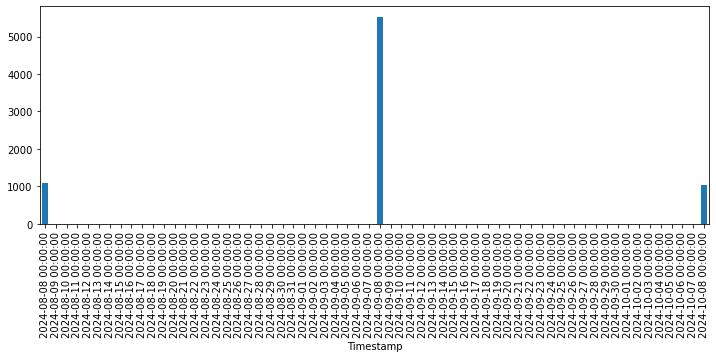

In [80]:
df2.resample("D")["Label"].count().plot(kind="bar", figsize=(12,4))


In [81]:
df1["Timestamp"] = pd.to_datetime(df1["Date"] + " " + df1["Time"])
df1 = df1.set_index("Timestamp")

<AxesSubplot:xlabel='Timestamp'>

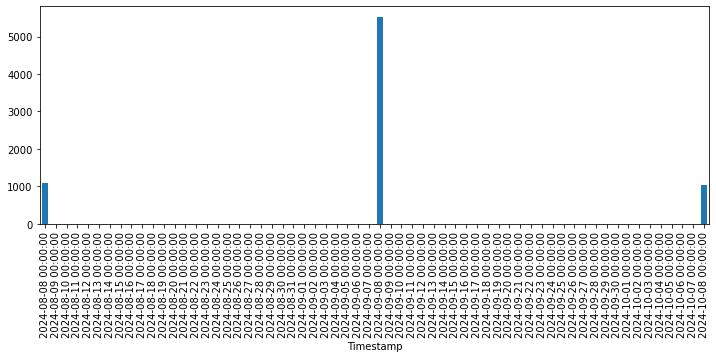

In [82]:
df1.resample("D")["Label"].count().plot(kind="bar", figsize=(12,4))

In [83]:
NOTE:
    The logger only has data on those days.

    Everything in between (Aug 9 → Sep 7, Sep 9 → Oct 7) is just empty — no rows at all.

    That’s why the resample is producing 16,992 NaNs → pandas is filling every missing 5-minute slot in those 2 big empty months.

     Why this happens

    The data logger seems to record for one day, stop for ~30 days, then record again.

    So in reality, we don’t have a continuous 2-month dataset, but three isolated single-day experiments.

SyntaxError: invalid syntax (1314662629.py, line 1)

In [84]:
# Find gaps larger than, say, 1 hour
gaps = df2.index.to_series().diff() > pd.Timedelta("1H")

# Assign block IDs
df2["block_id"] = gaps.cumsum()

#  groupping by block
for block, data in df2.groupby("block_id"):
    print(f"Block {block}: {data.index.min()} → {data.index.max()} ({len(data)} rows)")


Block 0: 2024-08-08 19:19:56 → 2024-08-08 23:59:46 (1086 rows)
Block 1: 2024-09-08 00:00:02 → 2024-09-08 23:59:46 (5532 rows)
Block 2: 2024-10-08 00:00:02 → 2024-10-08 04:35:21 (1033 rows)


In [85]:
block0 = df2[df2["block_id"] == 0]   # Aug 8th
block1 = df2[df2["block_id"] == 1]   # Sep 8th
block2 = df2[df2["block_id"] == 2]   # Oct 8th


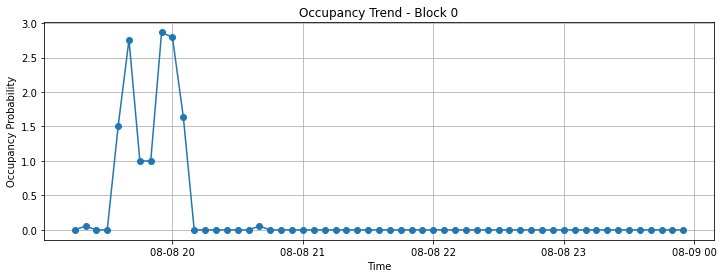

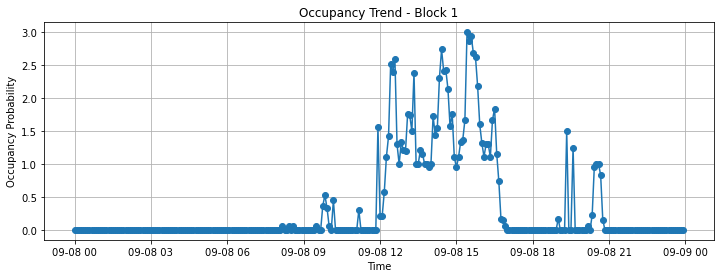

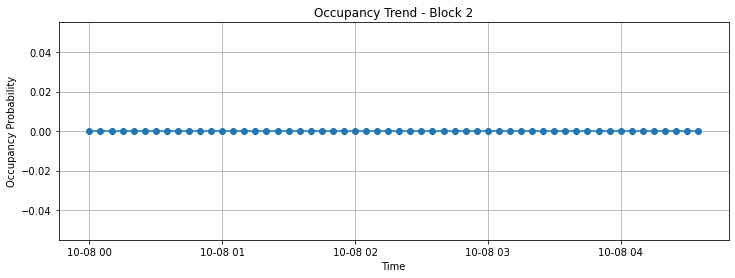

In [86]:
for i, block in enumerate([block0, block1, block2]):
    occ_resampled = block["Label"].resample("5T").mean()

    plt.figure(figsize=(12, 4))
    plt.plot(occ_resampled.index, occ_resampled.values, marker="o", linestyle="-")
    plt.title(f"Occupancy Trend - Block {i}")
    plt.ylabel("Occupancy Probability")
    plt.xlabel("Time")
    plt.grid(True)
    plt.show()



In [87]:
for i, block in enumerate([block0, block1, block2]):
    print(f"\n--- Block {i} ---")
    print("Start:", block.index.min())
    print("End:  ", block.index.max())
    print("Rows: ", len(block))
    print("Occupancy counts:\n", block["Label"].value_counts())



--- Block 0 ---
Start: 2024-08-08 19:19:56
End:   2024-08-08 23:59:46
Rows:  1086
Occupancy counts:
 0    967
3    110
1      9
Name: Label, dtype: int64

--- Block 1 ---
Start: 2024-09-08 00:00:02
End:   2024-09-08 23:59:46
Rows:  5532
Occupancy counts:
 0    4247
1     824
3     461
Name: Label, dtype: int64

--- Block 2 ---
Start: 2024-10-08 00:00:02
End:   2024-10-08 04:35:21
Rows:  1033
Occupancy counts:
 0    1033
Name: Label, dtype: int64


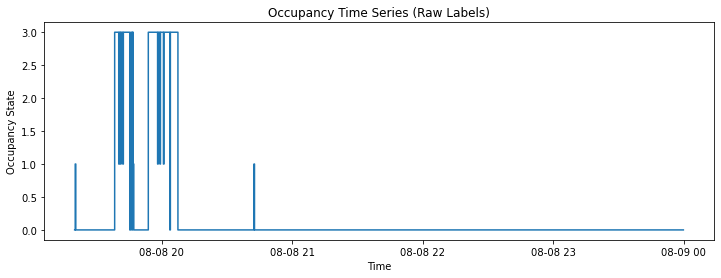

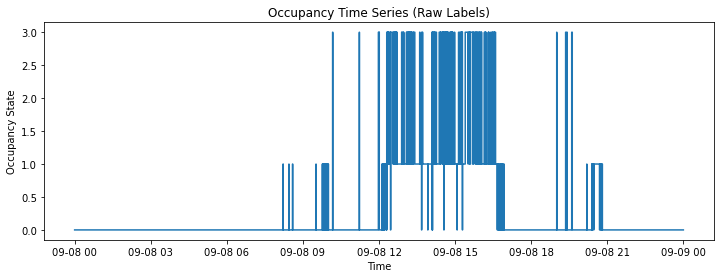

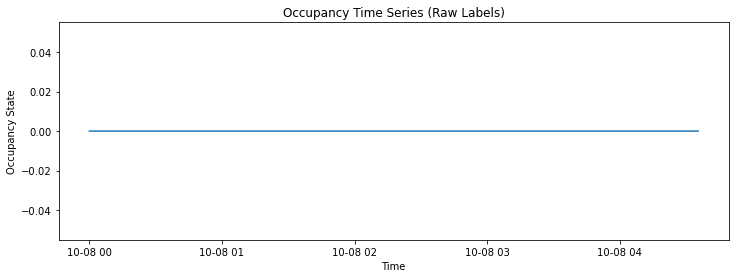

In [88]:
for i, block in enumerate([block0, block1, block2]):
    occ_resampled = block["Label"].resample("5T").mean()
    
    plt.figure(figsize=(12,4))
    plt.plot(block["Label"], drawstyle="steps-post")
    plt.title("Occupancy Time Series (Raw Labels)")
    plt.ylabel("Occupancy State")
    plt.xlabel("Time")
    plt.show()

In [94]:
blocks = {
    0: df2[df2["block_id"] == 0],  # Aug 8th
    1: df2[df2["block_id"] == 1],  # Sep 8th
    2: df2[df2["block_id"] == 2],  # Oct 8th
}

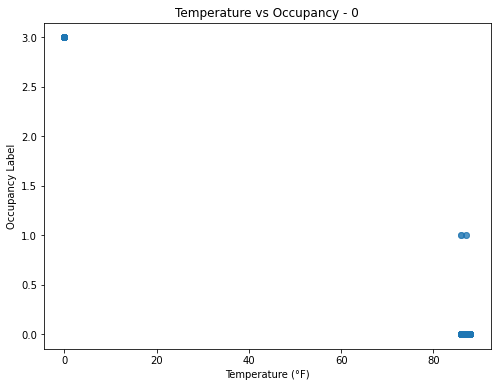

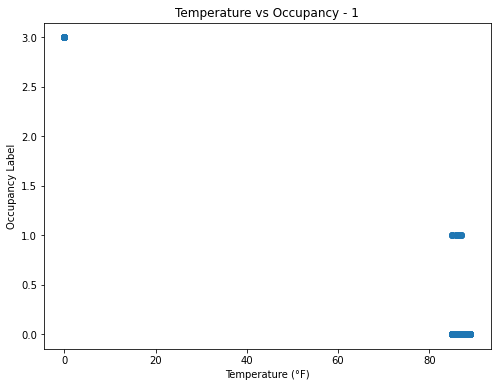

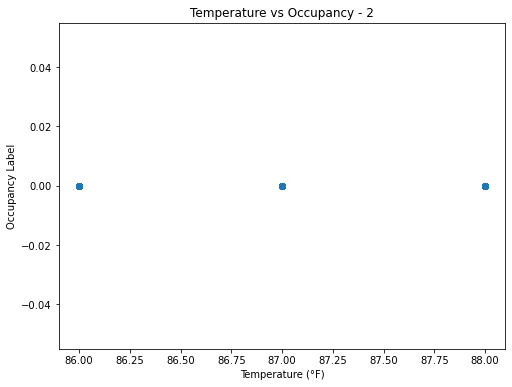

In [97]:



for name, block in blocks.items():
    plt.figure(figsize=(8,6))
    plt.scatter(block["Temperature_F"], block["Label"], alpha=0.3)
    plt.xlabel("Temperature (°F)")
    plt.ylabel("Occupancy Label")
    plt.title(f"Temperature vs Occupancy - {name}")
    plt.show()



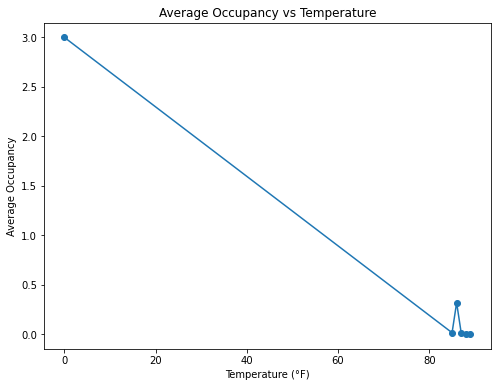

In [98]:
temp_occ = df2.groupby("Temperature_F")["Label"].mean()

plt.figure(figsize=(8,6))
plt.plot(temp_occ.index, temp_occ.values, marker="o", linestyle="-")
plt.xlabel("Temperature (°F)")
plt.ylabel("Average Occupancy")
plt.title("Average Occupancy vs Temperature")
plt.show()


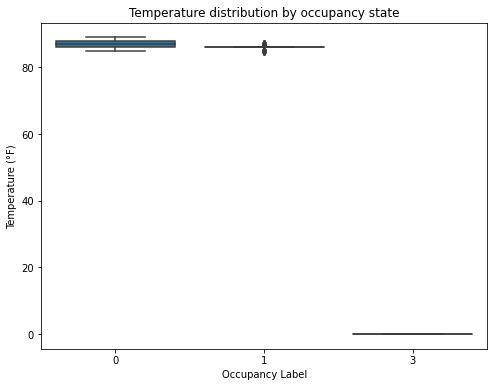

In [107]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Label", y="Temperature_F", data=df2)
plt.xlabel("Occupancy Label")
plt.ylabel("Temperature (°F)")
plt.title("Temperature distribution by occupancy state")
plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


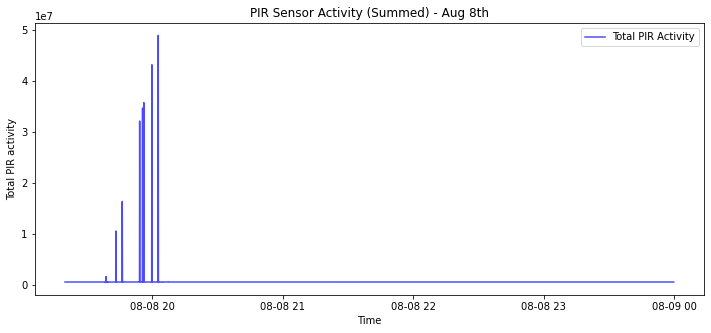

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


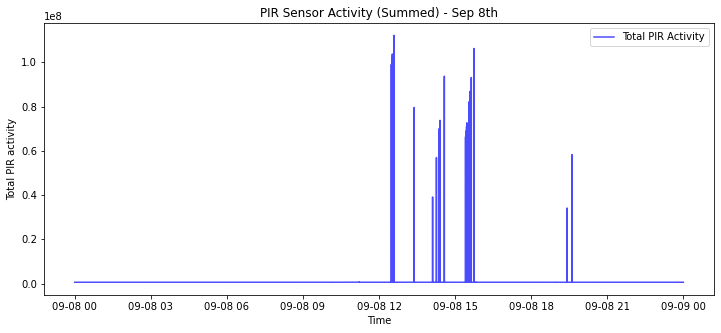

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/2375442067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


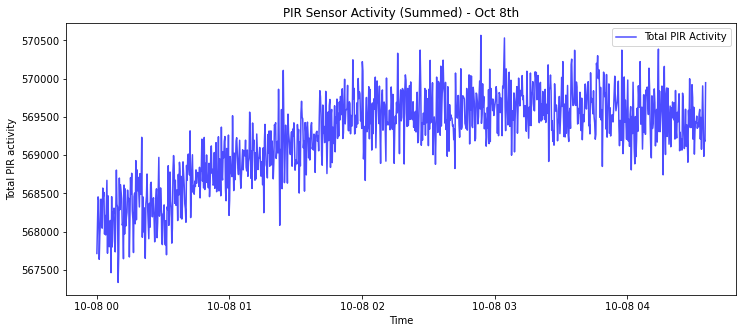

In [108]:


pir_cols = [col for col in df2.columns if "PIR_" in col]

for name, block in blocks.items():
    # 1. Sum across all PIRs
    block["PIR_total"] = block[pir_cols].sum(axis=1)

    plt.figure(figsize=(12,5))
    plt.plot(block.index, block["PIR_total"], label="Total PIR Activity", color="blue", alpha=0.7)
    plt.xlabel("Time")
    plt.ylabel("Total PIR activity")
    plt.title(f"PIR Sensor Activity (Summed) - {name}")
    plt.legend()
    plt.show()

   


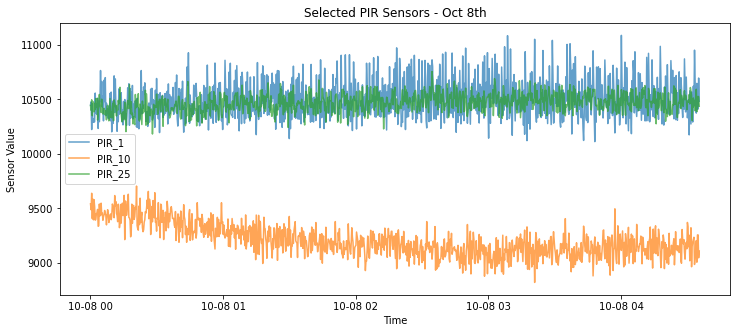

In [109]:
# 2. Example: Selected PIRs
plt.figure(figsize=(12,5))
plt.plot(block.index, block["PIR_1"], label="PIR_1", alpha=0.7)
plt.plot(block.index, block["PIR_10"], label="PIR_10", alpha=0.7)
plt.plot(block.index, block["PIR_25"], label="PIR_25", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.title(f"Selected PIR Sensors - {name}")
plt.legend()
plt.show()

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


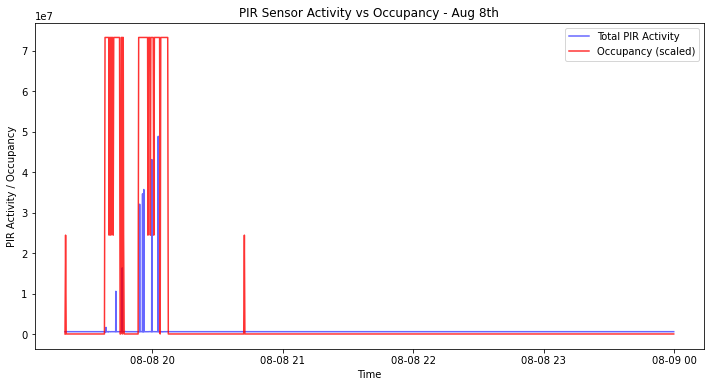

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


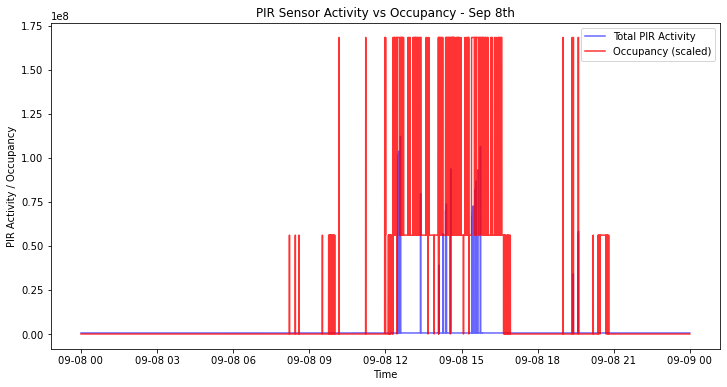

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3236268795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["PIR_total"] = block[pir_cols].sum(axis=1)


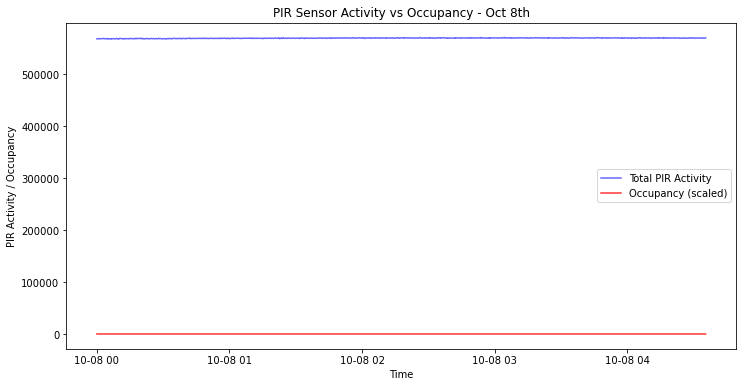

In [110]:


pir_cols = [col for col in df2.columns if "PIR_" in col]

for name, block in blocks.items():
    # Total PIR activity (sum across all sensors)
    block["PIR_total"] = block[pir_cols].sum(axis=1)

    plt.figure(figsize=(12,6))

    # Plot PIR activity (scaled for visibility)
    plt.plot(block.index, block["PIR_total"], label="Total PIR Activity", color="blue", alpha=0.6)

    # Overlay Occupancy (scale so it’s visible on the same plot)
    plt.plot(block.index, block["Label"] * block["PIR_total"].max() * 0.5, 
             label="Occupancy (scaled)", color="red", alpha=0.8)

    plt.xlabel("Time")
    plt.ylabel("PIR Activity / Occupancy")
    plt.title(f"PIR Sensor Activity vs Occupancy - {name}")
    plt.legend()
    plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


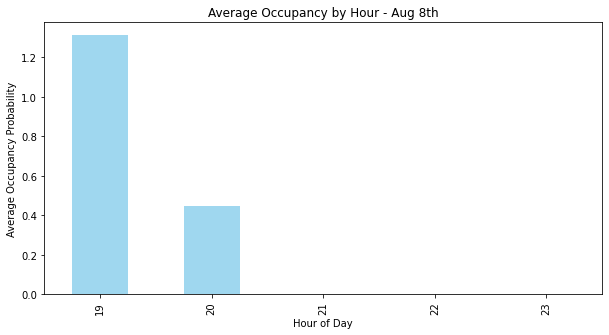

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


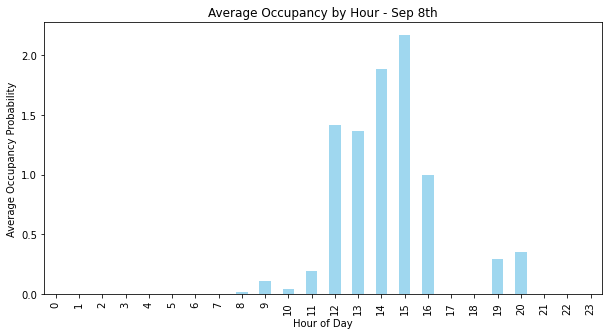

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/3239390802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour


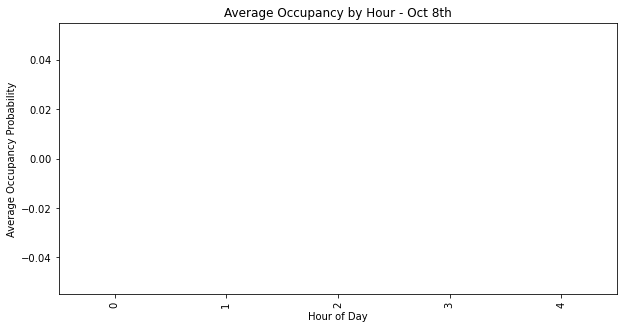

In [111]:
for name, block in blocks.items():
    # extract hour of day
    block["hour"] = block.index.hour
    
    # average occupancy probability per hour
    hourly_profile = block.groupby("hour")["Label"].mean()

    plt.figure(figsize=(10,5))
    hourly_profile.plot(kind="bar", color="skyblue", alpha=0.8)
    plt.ylabel("Average Occupancy Probability")
    plt.xlabel("Hour of Day")
    plt.title(f"Average Occupancy by Hour - {name}")
    plt.show()


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1729983021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour
/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1729983021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["day"] = block.index.date


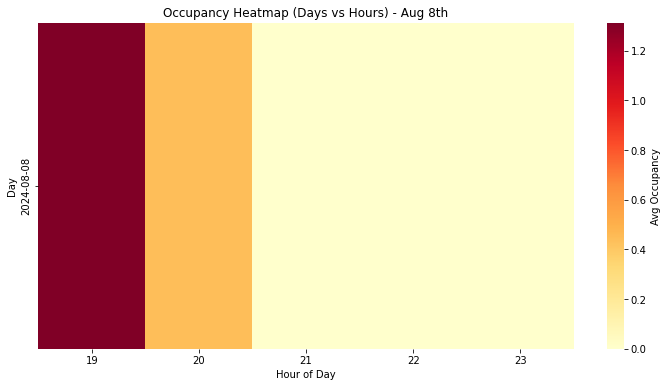

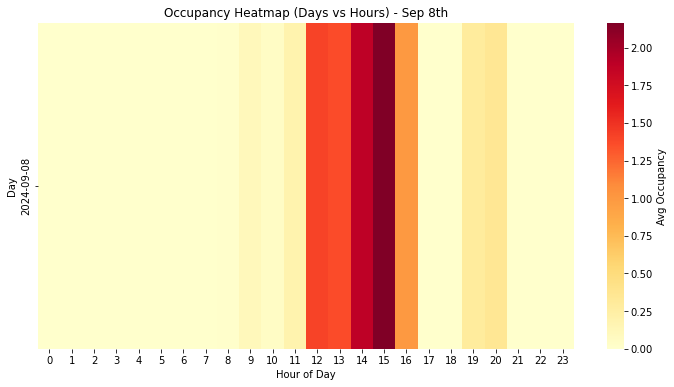

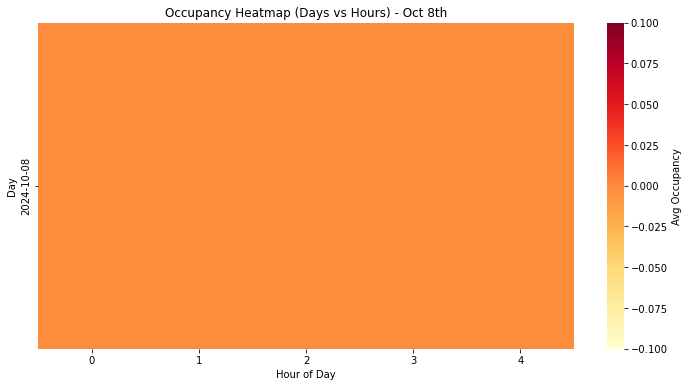

In [112]:
import seaborn as sns

for name, block in blocks.items():
    block["hour"] = block.index.hour
    block["day"] = block.index.date
    
    # pivot table (rows = day, cols = hour)
    heatmap_data = block.pivot_table(values="Label", index="day", columns="hour", aggfunc="mean")

    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Avg Occupancy'})
    plt.title(f"Occupancy Heatmap (Days vs Hours) - {name}")
    plt.ylabel("Day")
    plt.xlabel("Hour of Day")
    plt.show()

    

/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1534998062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["hour"] = block.index.hour
/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_13217/1534998062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block["weekday"] = block.index.dayofweek  # 0=Mon, 6=Sun


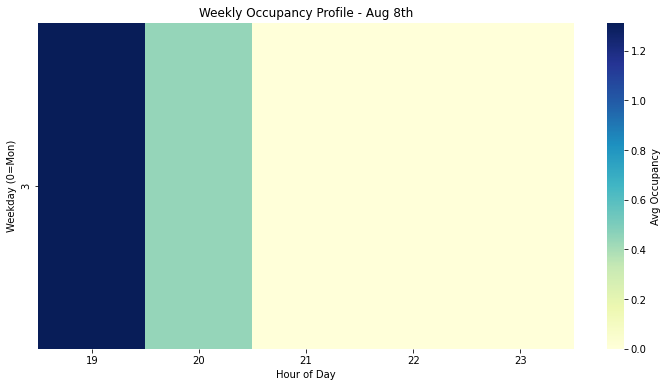

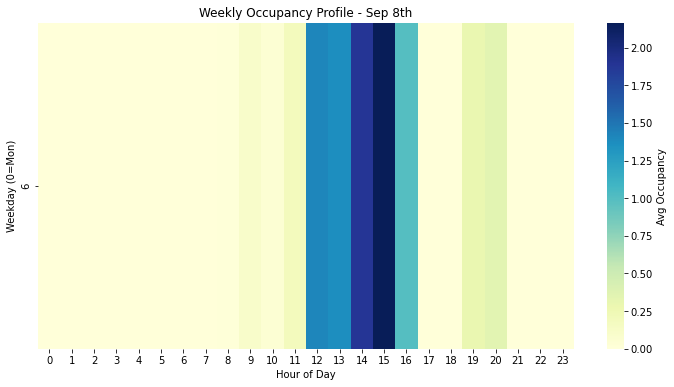

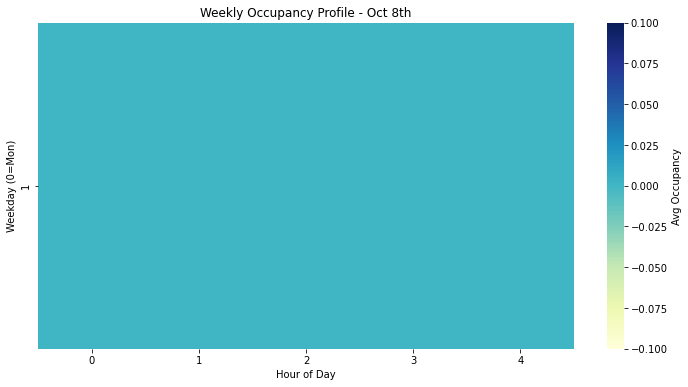

In [113]:
for name, block in blocks.items():
    block["hour"] = block.index.hour
    block["weekday"] = block.index.dayofweek  # 0=Mon, 6=Sun
    
    weekly_profile = block.groupby(["weekday", "hour"])["Label"].mean().unstack()

    plt.figure(figsize=(12,6))
    sns.heatmap(weekly_profile, cmap="YlGnBu", cbar_kws={'label': 'Avg Occupancy'})
    plt.title(f"Weekly Occupancy Profile - {name}")
    plt.ylabel("Weekday (0=Mon)")
    plt.xlabel("Hour of Day")
    plt.show()
